In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv("linear_regression_dataset.csv")
df

,Feature1,Feature2,Feature3,Category,Name,Target
0,54.967142,72.642384,62,A,Alice,371.099650
1,48.617357,64.446117,63,B,Charlie,299.184743
2,56.476885,61.820944,25,C,Bob,319.605931
3,65.230299,62.149045,56,C,Alice,348.440917
4,47.658466,41.569469,33,C,Bob,201.644393
...,...,...,...,...,...,...
200,54.967142,72.642384,62,A,Alice,371.099650
201,48.617357,64.446117,63,B,Charlie,299.184743
202,56.476885,61.820944,25,C,Bob,319.605931
203,65.230299,62.149045,56,C,Alice,348.440917


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 0 to 204
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  188 non-null    float64
 1   Feature2  188 non-null    float64
 2   Feature3  188 non-null    int64  
 3   Category  188 non-null    object 
 4   Name      188 non-null    object 
 5   Target    188 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 10.3+ KB


In [5]:
df.isnull().sum()

,0
Feature1,10
Feature2,8
Feature3,0
Category,0
Name,0
Target,0


In [11]:
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 0 to 204
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  188 non-null    float64
 1   Feature2  188 non-null    float64
 2   Feature3  188 non-null    int64  
 3   Category  188 non-null    object 
 4   Name      188 non-null    object 
 5   Target    188 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 10.3+ KB


In [12]:
df.duplicated().sum()

np.int64(5)

In [16]:
df= df.drop_duplicates()


In [17]:
df.duplicated().sum()

np.int64(0)

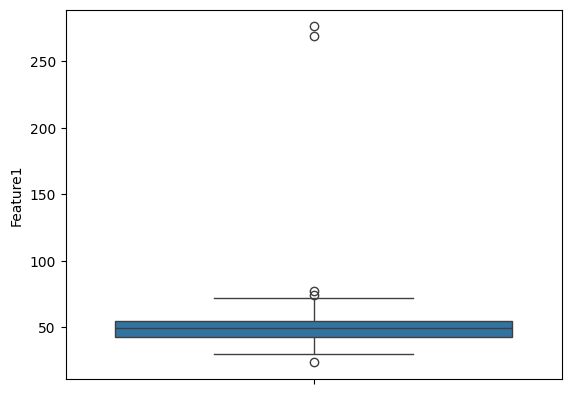

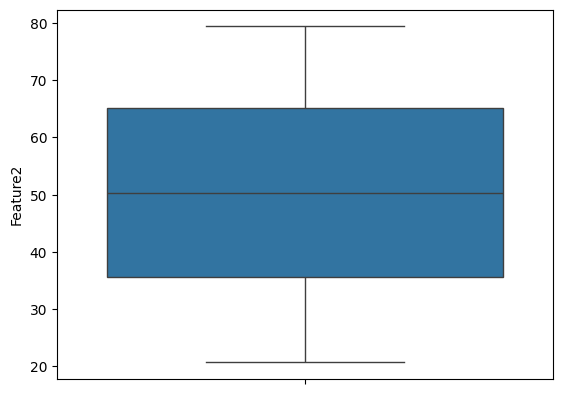

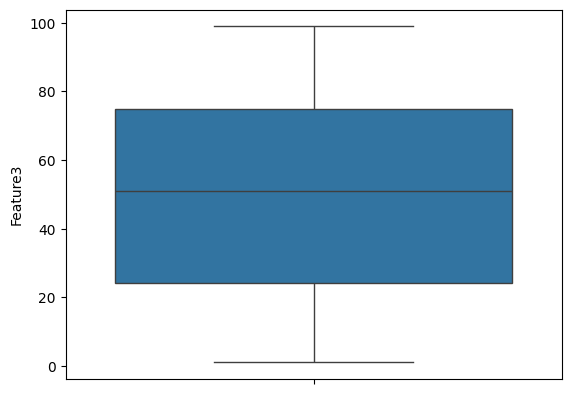

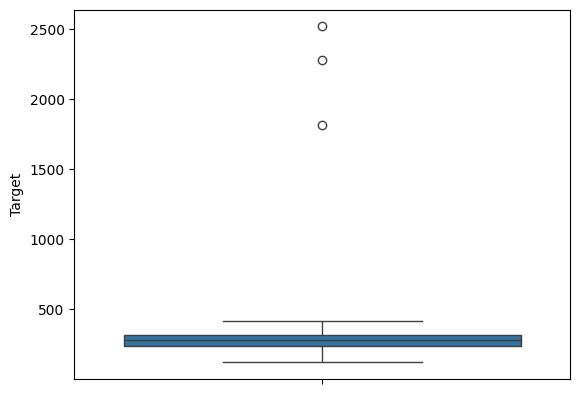

In [19]:
for col in df.columns:
  if df[col].dtype!="object":
    sns.boxplot(df[col])
    plt.show()

In [20]:
df.columns

Index(['Feature1', 'Feature2', 'Feature3', 'Category', 'Name', 'Target'], dtype='object')

In [22]:
outlist=['Target','Feature1']

In [23]:
for col in outlist:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lb=Q1-1.5*IQR
  ub=Q3+1.5*IQR
  df=df[(df[col]>=lb)&(df[col]<=ub)]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 0 to 199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  175 non-null    float64
 1   Feature2  175 non-null    float64
 2   Feature3  175 non-null    int64  
 3   Category  175 non-null    object 
 4   Name      175 non-null    object 
 5   Target    175 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.6+ KB


In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
  if df[col].dtype=="object":
    df[col]=le.fit_transform(df[col])

In [26]:
df

,Feature1,Feature2,Feature3,Category,Name,Target
0,54.967142,72.642384,62,0,0,371.099650
1,48.617357,64.446117,63,1,2,299.184743
2,56.476885,61.820944,25,2,1,319.605931
3,65.230299,62.149045,56,2,0,348.440917
4,47.658466,41.569469,33,2,1,201.644393
...,...,...,...,...,...,...
195,53.853174,27.129075,16,2,0,174.938593
196,41.161426,27.051575,8,2,3,184.883015
197,51.537251,58.952618,4,0,3,308.406474
198,50.582087,64.762693,4,1,3,265.922229


In [27]:
x=df.drop("Target",axis=1)
y=df["Target"]

In [28]:
x

,Feature1,Feature2,Feature3,Category,Name
0,54.967142,72.642384,62,0,0
1,48.617357,64.446117,63,1,2
2,56.476885,61.820944,25,2,1
3,65.230299,62.149045,56,2,0
4,47.658466,41.569469,33,2,1
...,...,...,...,...,...
195,53.853174,27.129075,16,2,0
196,41.161426,27.051575,8,2,3
197,51.537251,58.952618,4,0,3
198,50.582087,64.762693,4,1,3


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [30]:
x_train

,Feature1,Feature2,Feature3,Category,Name
30,43.982934,27.623631,54,2,2
135,65.499344,65.272572,12,0,1
5,47.658630,37.615511,38,2,1
64,58.125258,45.176004,29,2,1
164,59.633761,41.054901,52,0,2
...,...,...,...,...,...
43,46.988963,39.377388,28,0,3
132,39.376963,71.504765,54,2,1
120,57.910319,64.104263,77,0,2
109,49.255541,60.980406,37,2,0


In [31]:
x_test

,Feature1,Feature2,Feature3,Category,Name
68,53.616360,20.863609,6,1,2
146,37.630493,39.158818,85,0,3
154,52.930725,60.351107,38,2,1
46,45.393612,46.338285,36,2,3
75,58.219025,25.870050,56,0,1
155,42.856486,65.142472,50,1,0
94,46.078918,76.413814,98,0,1
60,45.208258,77.291917,33,1,0
88,44.702398,59.521618,86,1,1
73,65.646437,62.219472,66,1,0


In [33]:
from sklearn.linear_model import LinearRegression
ll=LinearRegression()
ll.fit(x_train,y_train)

LinearRegression()

In [34]:
answers=ll.predict(x_test)
answers

array([210.66877804, 241.74301092, 292.17894554, 236.2565422 ,
       263.64927728, 299.04930427, 346.37874035, 319.8556138 ,
       299.65866613, 348.32372533, 319.19905849, 198.48371223,
       212.56501256, 290.23513746, 216.86341681, 227.36402585,
       351.42407057, 352.37448186, 197.22582318, 305.31881541,
       325.89325017, 248.6470548 , 257.3510086 , 230.95928585,
       256.37271513, 197.26425547, 313.54512155, 257.48781785,
       275.86524478, 209.75956795, 267.62905648, 281.87212959,
       329.73333929, 216.16287049, 329.99843996, 320.27888629,
       244.63169314, 275.93990458, 281.74596384, 276.63883304,
       314.41943005, 284.61953898, 248.76627045, 262.87332789,
       276.86613082, 285.05791717, 301.55889703, 287.80071155,
       287.87444903, 234.42438659, 258.83942235, 280.05395367,
       270.51632111])

In [35]:
from sklearn.metrics import r2_score
r2_score(answers,y_test)*100

32.60602562417372

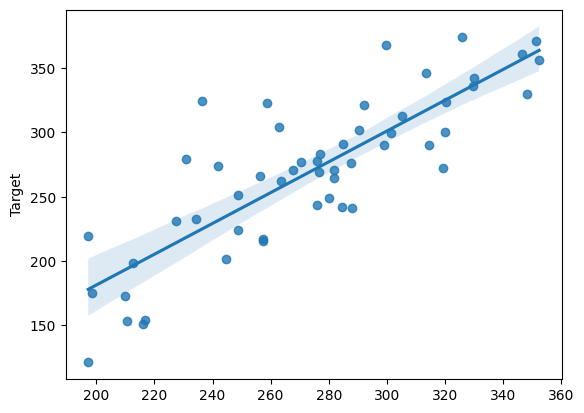

In [36]:
sns.regplot(x=answers,y=y_test)
plt.show()